# Исследование популярности компьютерных игр для планирования рекламных компаний.

 Нужна изучить данные о продажах игр, оценки пользователей и экспертов, жанры и платформы для планирования рекламных кампаний  на последующие года.
  - Первый этап - изучение общий информации.
  - Второй этап - предобработка данных.
  - Третий этап - исследовательский анализ данных.
  - Четвертый этап - исследование пользователей по регионам и проверка гипотез.
  - Пятый этап - общий вывод. 
 
Среди данных у нас есть Названия игр и платформ, год выпуска, жанр, проданные копии по регионам, оценка критиков и пользователей, рейтинг по возрастным категориям. Данные за 2016 год могут быть неполными.

##   Изучение общий информации. 

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\Users\\User\\Documents\\Phyton\\games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


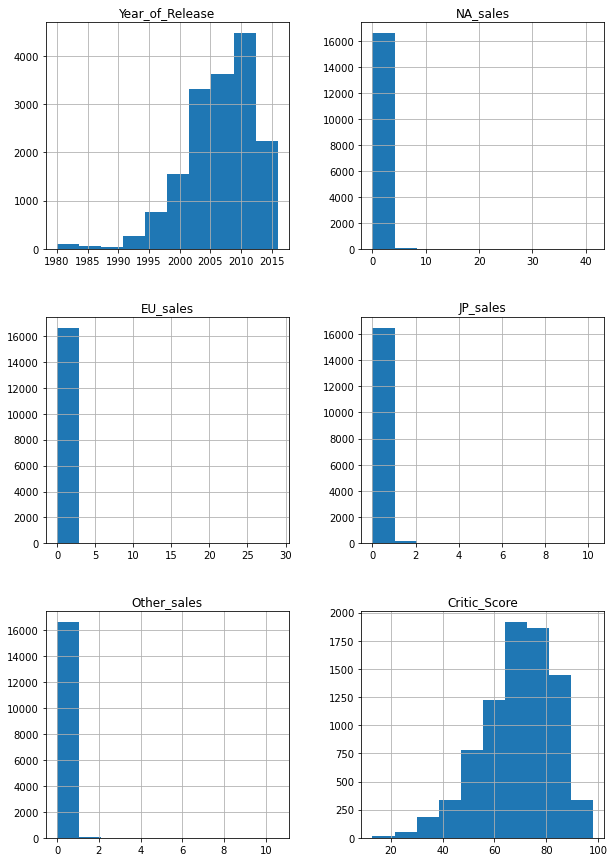

In [5]:
data.hist(figsize=(10, 15));

## Предобработка данных.

In [6]:
data.columns
data = data.rename(
    columns={'Name': 'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
             'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 
             'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}
    )
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')#заменяем аббревиатуру tbd(To Be Determined) на NaN.
#data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)#заменяем NaN на 0 и превидем года к типу int.
print(data['user_score'].dtype)

float64


Меняем тип user_score на тип float так-как там оценка идет в дробном значении. 

In [8]:
data = data.dropna(subset=['name'])#удаляем пропуски в названиях игр их не большое количество заодно пропали пропуски в столбце жанр 
data = data.dropna(subset=['year_of_release'])

- Пропуски в рейтингах не трогаем так-как некоторые игры еще могли их не получит, в колонке "оценка пользователей" часта встречается аббревиатура tbd(To Be Determined) которую используют если какая-то информация еще не определена или решение не принято, при использовании to_numeric заменяем их на NaN. Заменять на медиану и среднею не имеет смысла они только исказят данные. Пропуски в годах релиза возможны из-за повреждения данных так как общей свези в этих категориях нет, заменить их нечем.

In [9]:
len(data[data['year_of_release'].isnull()]) / len(data)

0.0

In [10]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data = data.query('sum_sales > 0')

In [11]:

(
    data[['year_of_release','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'sum_sales']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,"16,442.00","16,442.00","16,442.00","16,442.00","16,442.00","7,983.00","7,463.00","16,442.00"
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00,0.01
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


In [12]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].astype(int)

In [13]:
print(data['year_of_release'].dtype)
print(data['user_score'].dtype)

int32
float64


## Исследовательский анализ данных.

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
data_sales = data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').reset_index()
#display(data_sales)
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int32  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16442 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


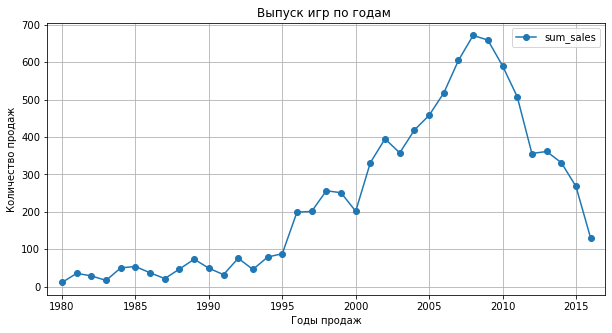

In [16]:
data_sales.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1979, 2017), grid=True, figsize=(10, 5))
plt.title('Выпуск игр по годам ')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

На графике продаж можно видеть популярность компьютерных игр по годам. Наибольший их рост происходил последние двадцать лет начиная с 1995, за 2016 год данные рассматривать не стоит так как они не полные, поэтому сложна судить о продажах играх которые вышли в этом году. 

In [17]:
data_platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').reset_index()
data_platform = data_platform.query('sum_sales > 10')
data_platform = data_platform.sort_values(by='sum_sales', ascending=False)
display(data_platform.head(10));

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


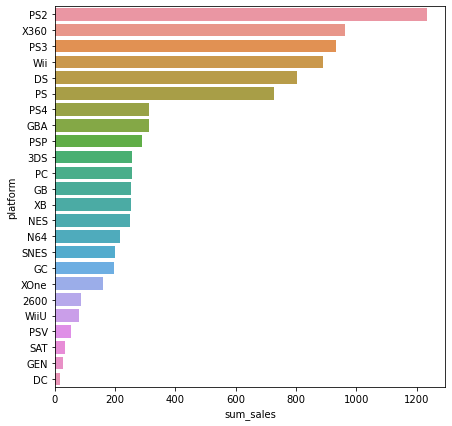

In [18]:
x = data_platform['sum_sales']
y = data_platform['platform'] 
sns.barplot(x = x, y = y)
plt.gcf().set_size_inches(7,7);

In [19]:
data_platform_01 = data.query('platform == "PS2"')
data_platform_02 = data.query('platform == "X360"')
data_platform_03 = data.query('platform == "PS3"')
data_platform_04 = data.query('platform == "Wii"')
data_platform_05 = data.query('platform == "DS"')
data_platform_06 = data.query('platform == "PS"')
data_platform_07 = data.query('platform == "GBA"')
data_platform_08 = data.query('platform == "PS4"')
data_platform_09 = data.query('platform == "PSP"')
data_platform_10 = data.query('platform == "PC"')
data_pivot_01 = data_platform_01.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_02 = data_platform_02.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_03 = data_platform_03.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_04 = data_platform_04.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_05 = data_platform_05.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_06 = data_platform_06.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_07 = data_platform_07.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_08 = data_platform_08.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_09 = data_platform_09.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
data_pivot_10 = data_platform_10.pivot_table(index=['year_of_release'], values='sum_sales', aggfunc='sum').reset_index()

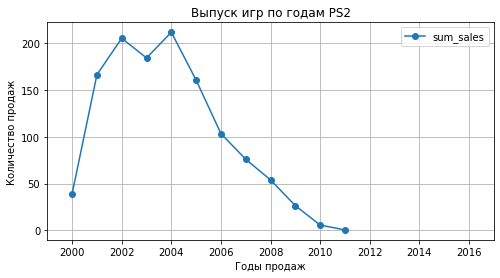

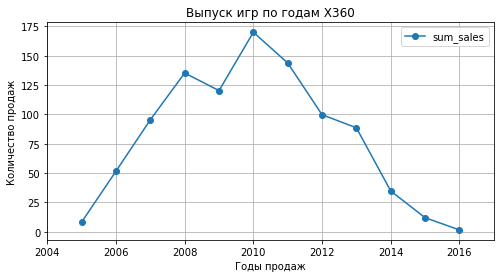

In [20]:
data_pivot_01.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1999, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PS2')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()
data_pivot_02.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2004, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам X360')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

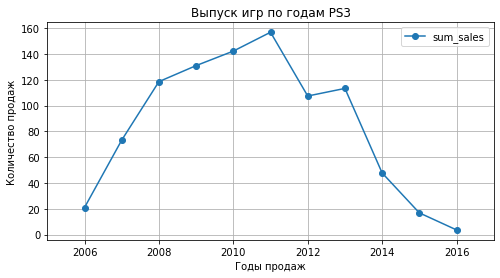

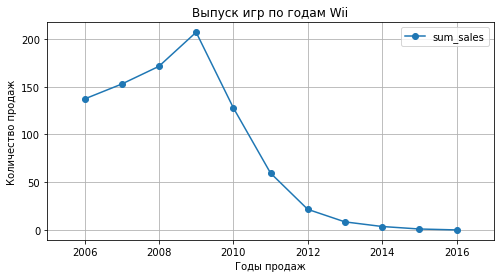

In [21]:
data_pivot_03.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2005, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PS3')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()
data_pivot_04.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2005, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам Wii')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

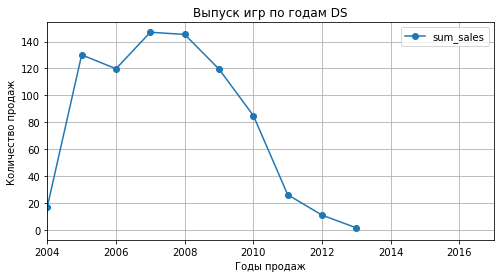

In [22]:
data_pivot_05.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2004, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам DS')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()


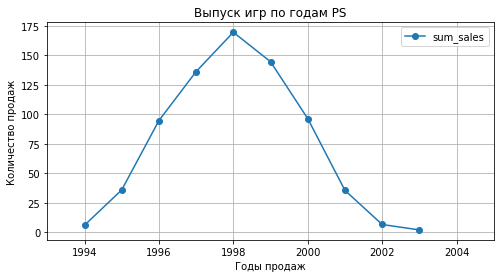

In [23]:
data_pivot_06.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1993, 2005), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PS')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

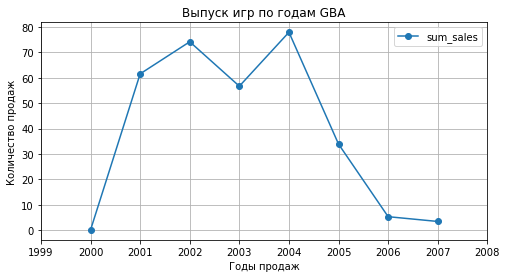

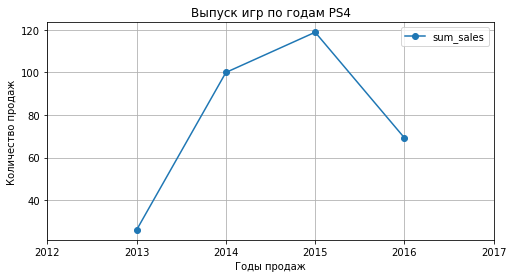

In [24]:
data_pivot_07.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1999, 2008), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам GBA')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()
data_pivot_08.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2012, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PS4')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

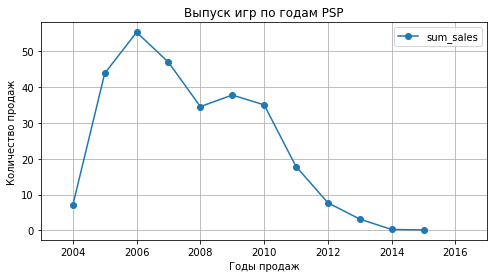

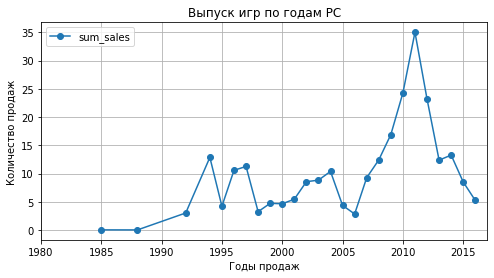

In [25]:
data_pivot_09.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(2003, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PSP')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()
data_pivot_10.plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017), grid=True, figsize=(8, 4));
plt.title('Выпуск игр по годам PC')
plt.xlabel('Годы продаж')
plt.ylabel('Количество продаж')
plt.show()

- Актуальность продаж игровых платформ на высоких показателях держится примерно 4-6 лет с релиза, новые поколения появляются после 8 - 10 лет от начала продаж прошлого поколения консолей, некоторые платформы имеют разное время релиза в зависимости от региона и страны что может повлиять на уровень продаж распределённого на графике. PS4 стартовала недавно и окончательные выводы по ней делать не стоит. Продажи на персональных компьютерах нужна рассматривать отдельна так как их характеристики разнятся. 

 - Для построения прогноза на 2017 год возьмем период с 2010 по 2012 год, данные c 2013 по 2016 не подходят так как многие платформы еще актуальны на данный период и сложна сделать вывод на основе количества продаж игр. Период до 2010 года не берем так как эти данные более старые и менее актуальные для последующих исследований.

- Возьмем топ 3 по продажам. Самой популярной платформой стала Play Station 2 которая выходила с 2000 по 2013 год, на втором месте Xbox 360 выходившая с 2005 по 2016 год и на третьем мести Play Station 3 с датой релиза 2006 и с постепенным  прекращением поддержки начиная с 2015 года. Продажи у этих консолей росли начиная с релиза первые 3-4 года и после падают. Рост идет у актуальных на данный момент консолях таких как PS4 и XOne. 

(0.0, 2.0)

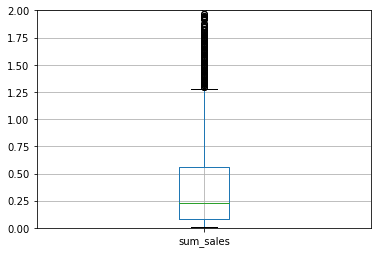

In [26]:
data.query('platform == "PS2"').boxplot(column=['sum_sales'])
#data_platform_01.boxplot(column=['sum_sales'])
plt.ylim(0, 2)

(0.0, 2.0)

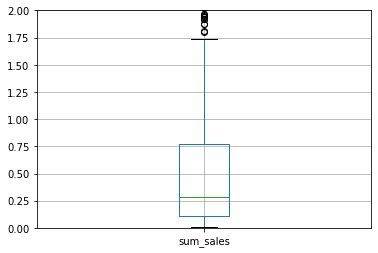

In [27]:
data.query('platform == "X360"').boxplot(column=['sum_sales'])
plt.ylim(0, 2)

(0.0, 2.0)

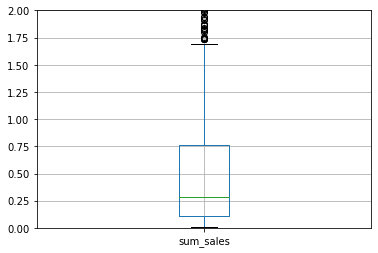

In [28]:
data.query('platform == "PS3"').boxplot(column=['sum_sales'])
plt.ylim(0, 2)

(0.0, 2.0)

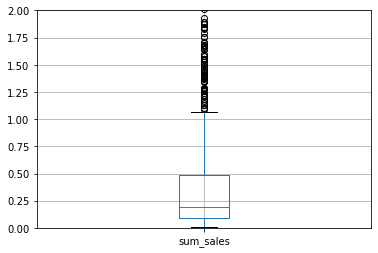

In [29]:
data.query('platform == "Wii"').boxplot(column=['sum_sales'])
plt.ylim(0, 2)

(0.0, 1.0)

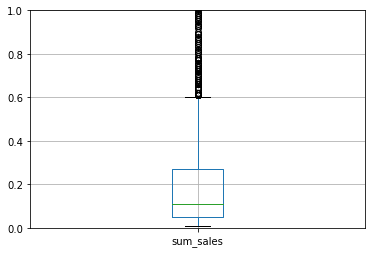

In [30]:
data.query('platform == "DS"').boxplot(column=['sum_sales'])
plt.ylim(0, 1)

- Если обобщить информацию с графиков можно увидеть, что большая часть значений верхнего квартала  лежит до 0.8,  нижний квартал лежит на уровне окала 0.1, что выглядит правдоподобна. Медиана у PS2 и у PS3 равняется  0.25, у Х360 примерна 0.26,  у Wii и DS - 0.1.

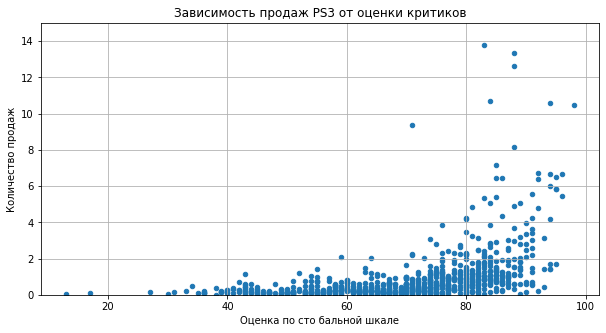

In [31]:
ps3_score = (
    data_platform_03.pivot_table(index='name', values= ['critic_score', 'user_score', 'sum_sales'])
    .reset_index()
    )
#print(ps3_score.head())
ps3_score.plot(kind='scatter', x='critic_score', y='sum_sales', ylim=(0, 15), grid=True, figsize=(10, 5))
plt.title('Зависимость продаж PS3 от оценки критиков')
plt.xlabel('Оценка по сто бальной шкале')
plt.ylabel('Количество продаж')
plt.show()

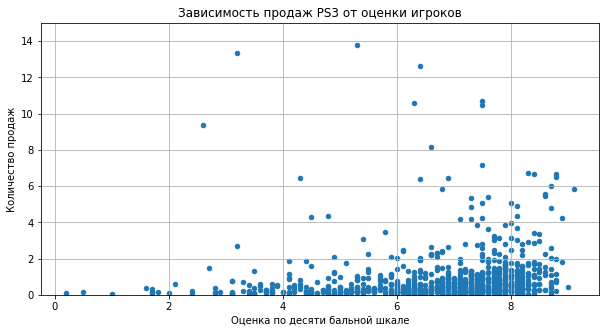

Корреляция по рейтингу игроков: 0.43309507652906293
Корреляция по рейтингу критиков: 0.12875349645700915


In [32]:
ps3_score.plot(kind='scatter', x='user_score', y='sum_sales', ylim=(0, 15), grid=True, figsize=(10, 5))
plt.title('Зависимость продаж PS3 от оценки игроков')
plt.xlabel('Оценка по десяти бальной шкале')
plt.ylabel('Количество продаж')
plt.show()
print('Корреляция по рейтингу игроков:', ps3_score['critic_score'].corr(ps3_score['sum_sales']))
print('Корреляция по рейтингу критиков:', ps3_score['user_score'].corr(ps3_score['sum_sales']))

- Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. За основу возьмем данные Play Station 3, так-как все консоли этой игровой серии попадают в топ 10 продаж, она входит в актуальный период и тренды в динамике данных по ней наиболее приближены к настоящему времени. На графиках можно видеть что чем выше оценка у игры тем больше копией ее продается, наибольшую взаимосвязь имеют количеством продаж с оценки критиков чем с оценками игроков и стоит в первую очередь ориентироваться по ним, оценки выше 9 и 90 очень редки.       

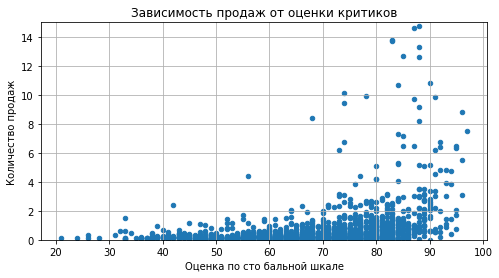

In [33]:
data_x = data.query('2010 <= year_of_release < 2013')
data_x.plot(kind='scatter', x='critic_score', y='sum_sales', ylim=(0, 15), grid=True, figsize=(8, 4))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка по сто бальной шкале')
plt.ylabel('Количество продаж')
plt.show()
#print(data_x)

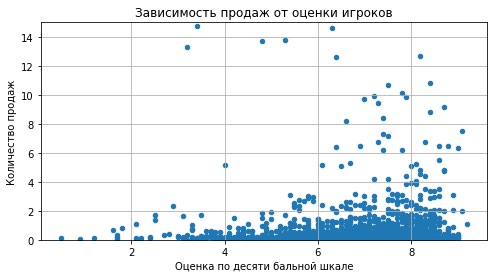

Корреляция по общему рейтингу игроков: 0.3283739733689528
Корреляция по общему рейтингу критиков: 0.09872061532409536


In [34]:
data_x.plot(kind='scatter', x='user_score', y='sum_sales', ylim=(0, 15), grid=True, figsize=(8, 4))
plt.title('Зависимость продаж от оценки игроков')
plt.xlabel('Оценка по десяти бальной шкале')
plt.ylabel('Количество продаж')
plt.show()
print('Корреляция по общему рейтингу игроков:', data_x['critic_score'].corr(data_x['sum_sales']))
print('Корреляция по общему рейтингу критиков:', data_x['user_score'].corr(data_x['sum_sales']))

- Если мы возьмём данные за период 2010 - 2012 год по всем платформам то увидим схожую картину и еще большую корреляцию между количеством продаж и оценкой.

In [35]:
data_genre = (
    data.pivot_table(index=['genre'], values='name', aggfunc='count')
    .reset_index().sort_values(by='name', ascending=False)
    )
display(data_genre)

,genre,name
0,Action,3307
10,Sports,2305
3,Misc,1721
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1293
6,Racing,1225
4,Platform,878
9,Simulation,857
2,Fighting,837


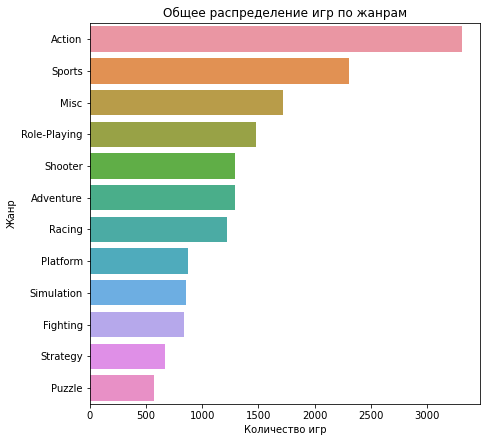

In [36]:
x = data_genre['name']
y = data_genre['genre'] 
sns.barplot(x = x, y = y)
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.gcf().set_size_inches(7,7);

In [37]:
data_genre_sum = (
    data.pivot_table(index=['genre'], values='sum_sales', aggfunc='median')
    .sort_values(by='sum_sales', ascending=False)
    )
display(data_genre_sum)

,sum_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


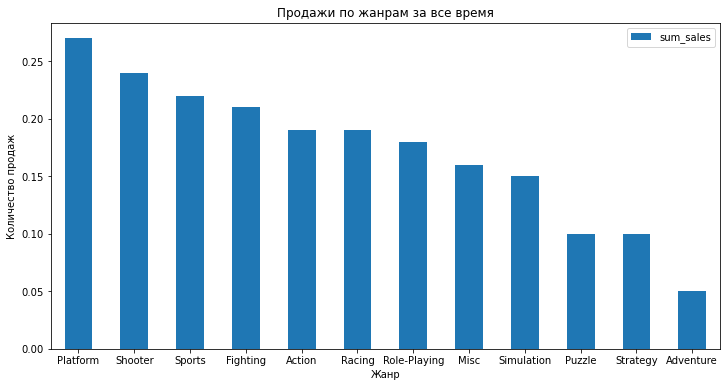

In [38]:
data_genre_sum.plot(kind='bar', y='sum_sales', figsize=(12, 6),  rot = 0)
plt.title('Продажи по жанрам за все время')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

- Cоотношение медианы продаж и количество игр по жанрам разница, например платформенные игры занимают 8 место по количеству, а по продажам 1 место.

,sum_sales
genre,
Shooter,0.32
Fighting,0.23
Platform,0.21
Action,0.19
Sports,0.19


,sum_sales
genre,
Misc,0.130
Simulation,0.100
Strategy,0.095
Puzzle,0.070
Adventure,0.040


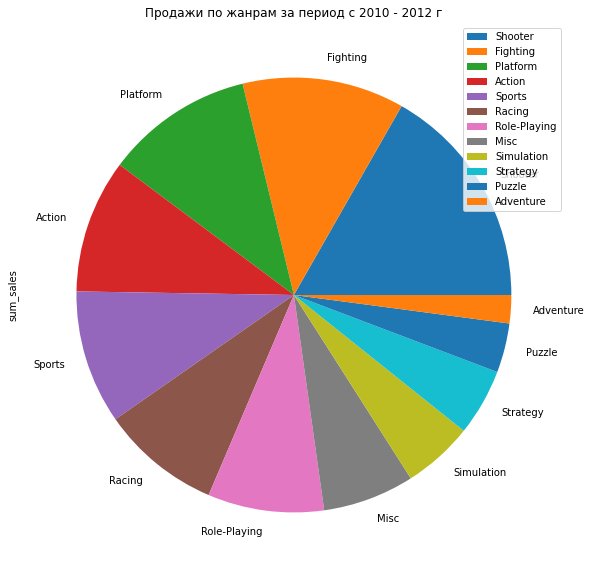

In [39]:
data_g_s = (
    data_x.pivot_table(index=['genre'], values='sum_sales', aggfunc='median')
    .sort_values(by='sum_sales', ascending=False)
    )
display(data_g_s.head())
display(data_g_s.tail())
data_g_s.plot(kind='pie', x='genre', y='sum_sales',  figsize=(15, 10))
plt.title('Продажи по жанрам за период с 2010 - 2012 г')
plt.show()

- Посмотрим данные за период с 2010 по 2012 года, лидирующие позиции занимают shooter, sports, action, platform и racing. В позиции замыкающих жанров сложились небольшие перестановки, но жанр strategy и adventure все еще является самыми не популярным.  

## Исследование пользователей по регионам и проверка гипотез.

 ### Исследование пользователей.

In [40]:
df_platform  = pd.DataFrame(
    ({'top': [1, 2, 3, 4, 5],
    'platform_na': ['X360', 'PS3', 'WiiU', 'Wii', '3DS'], 'na_sales': [0.511174, 0.304688, 0.277813, 0.268478, 0.212679],
    'platform_eu': ['PS3', 'X360', 'WiiU', 'PC', '3DS' ],'eu_sales': [0.267996, 0.244717, 0.165000, 0.149862, 0.145024],
    'platform_jp': ['3DS', 'PSP', 'WiiU', 'PS3',  'DS', ],'jp_sales': [0.156986, 0.089861, 0.066562, 0.066011, 0.055912],
    'platform_other': ['PS3', 'X360', 'PSV', 'Wii', 'WiiU'],'other_sales': [0.108199, 0.071356, 0.044648, 0.039789, 0.039375]})
     )
display(
    (df_platform.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Blues')
     .set_caption('Самые популярные платформы для пользователей каждого региона за 2010-2012 г')
      .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '15px')]}])
     .hide_index())
    )   

C:\Users\User\AppData\Local\Temp\ipykernel_17432\3571005328.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  (df_platform.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Blues')


top,platform_na,na_sales,platform_eu,eu_sales,platform_jp,jp_sales,platform_other,other_sales
1,X360,0.511174,PS3,0.267996,3DS,0.156986,PS3,0.108199
2,PS3,0.304688,X360,0.244717,PSP,0.089861,X360,0.071356
3,WiiU,0.277813,WiiU,0.165000,WiiU,0.066562,PSV,0.044648
4,Wii,0.268478,PC,0.149862,PS3,0.066011,Wii,0.039789
5,3DS,0.212679,3DS,0.145024,DS,0.055912,WiiU,0.039375


- Практически во всех регионах в топы входят консоли серии Play Station, Xbox и Nintendo, в Европе также популярны игры на персональные компьютеры. Стоит обратить внимание что во всех топах также присутствует портативная консоль Nintendo DS и 3DS, а в Японии портативные консоли(DS, 3DS, PSP) занимают сразу три позиции - первое, четвертое и пятое места. 

In [41]:
df_genre  = pd.DataFrame(
({'top': [1, 2, 3, 4, 5],
'genre_na': ['Shooter', 'Platform', 'Sports', 'Role-Playing', 'Misc'], 'na_sales': [0.572780, 0.465316, 0.253573, 0.237862, 0.228765],
'genre_eu': ['Shooter', 'Platform', 'Racing', 'Action', 'Sports'],'eu_sales': [0.374843, 0.287595, 0.227368, 0.158436, 0.156011],
'genre_jp': ['Role-Playing', 'Platform', 'Simulation', 'Fighting', 'Strategy'],'jp_sales': [0.190217, 0.139494, 0.056645, 0.052521, 0.044123],
'genre_other': ['Shooter', 'Platform', 'Racing', 'Sports', 'Action'],'other_sales': [0.125605, 0.083418, 0.070395, 0.054792, 0.054074]})
    )
display(df_genre.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Greens')
     .set_caption('Самые популярные жанры для пользователей каждого региона за 2010-2012 г')
      .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '15px')]}])
     .hide_index())

C:\Users\User\AppData\Local\Temp\ipykernel_17432\3185120939.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(df_genre.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Greens')


top,genre_na,na_sales,genre_eu,eu_sales,genre_jp,jp_sales,genre_other,other_sales
1,Shooter,0.572780,Shooter,0.374843,Role-Playing,0.190217,Shooter,0.125605
2,Platform,0.465316,Platform,0.287595,Platform,0.139494,Platform,0.083418
3,Sports,0.253573,Racing,0.227368,Simulation,0.056645,Racing,0.070395
4,Role-Playing,0.237862,Action,0.158436,Fighting,0.052521,Sports,0.054792
5,Misc,0.228765,Sports,0.156011,Strategy,0.044123,Action,0.054074


- Наиболее популярными жанрами в многих регионах являются жанры Shooter и Platform. Начиная с третьего места предпочтения жанров начинают разница. Японию стоит рассмотреть отдельна там исторически сложилась что многие игры выходят для внутреннего рынка и сформировался отдельный поджанр JRPG что скорее всего и повлияла на то что жанр Role-Playing занял первое место хотя в остальных регионах он не входит в топ 3. Также из топа Японии пропал жанры Shooter тут можно предположить что в этом жанре проводят много киберспортивных соревновательных игр которые придают долю популярности этому жанру, но из-за запрет правительством Японии на соревнования, которые предполагают денежные призы продвижение этого жанра было не таким сильным как в других регионах. 

In [42]:
df_rating  = pd.DataFrame(
({'top': [1, 2, 3, 4, 5],
'rating_na': ['M','E', 'E10+', 'EC', 'T'], 'na_sales': [0.620029, 0.302044, 0.299544, 0.226000, 0.215992],
'rating_eu': ['M', 'E', 'E10+', 'T', 'Other'],'eu_sales': [0.419200, 0.179214, 0.161225, 0.138385, 0.050994],
'rating_jp': ['Other','E', 'M', 'T', 'E10+'],'jp_sales': [0.072822, 0.051462, 0.046686, 0.041868, 0.020883],
'rating_other': ['M', 'E', 'E10+','T','Other'],'other_sales': [0.142686, 0.058852, 0.052934, 0.047529, 0.014364]})
    );
display(df_rating.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Oranges')
     .set_caption('Влияние рейтинга ESRB на среднии продажи для пользователей каждого региона за 2010-2012 г')
      .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '15px')]}])
     .hide_index());

C:\Users\User\AppData\Local\Temp\ipykernel_17432\616927145.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(df_rating.style.background_gradient(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], cmap='Oranges')


top,rating_na,na_sales,rating_eu,eu_sales,rating_jp,jp_sales,rating_other,other_sales
1,M,0.620029,M,0.419200,Other,0.072822,M,0.142686
2,E,0.302044,E,0.179214,E,0.051462,E,0.058852
3,E10+,0.299544,E10+,0.161225,M,0.046686,E10+,0.052934
4,EC,0.226000,T,0.138385,T,0.041868,T,0.047529
5,T,0.215992,Other,0.050994,E10+,0.020883,Other,0.014364


- Первое место почти везде занимают игры с категорией М(для взрослых), на втором Е(для всех) такой игрой можно заинтересовать как взрослого так и ребенка, на третьем месте E10+(для всех от 10 лет и старше). Четвертое у всех регионов занимает Т(подростки)  кроме Северной Америки тут предпочитают более низко возрастную категорию EC(для детей младшего возраста), но разрыв с Т у них не большой. Япония выделяется на фоне остальных регионов, здесь рейтинг E более предпочтительней чем M и сдвинут в низ, а первое место занимает Other(не получившие оценку), эта возможно по причини того что ESRB оценивает игры в основном те что распространяются в Севера Американском регионе, а в Японии продается много игр для внутреннего рынка которые практически не выходят за приделы страны.

### Проверка гипотез.

Возмем период времени для «PC» с релиза «Xbox One».

Проверка гипотезы: средняя рейтенгов плотформ «Xbox One» и «PC» одинаковые;

```
H_0: Рейтинг проданых копий(user_score) плотформы "Xbox One" = рейтинг проданых копий(user_score) плотформы "PC"
H_a: Рейтинг проданых копий(user_score) плотформы "Xbox One" ≠ рейтинг проданых копий(user_score) плотформы "PC"
alpha = 0.05
```

In [43]:
from scipy import stats as st
import numpy as np

In [44]:
df_xone = data.query('platform == "XOne"')
df_pc = data.query('platform == "PC" and 2012 < year_of_release')
#print(df_xone.count())
#print(df_pc.count())
xone = df_xone['user_score'].fillna(0)
pc = df_pc['user_score'].fillna(0)

In [45]:
results = st.ttest_ind(xone, pc, equal_var=False)# equal_var=False
alpha = 0.05 
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.24400999542744453
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: средняя рейтенгов жанра «Action» и «Sports» одинаковые;

```
H_0: Рейтинг проданых копий(user_score) жанра "Action" = рейтинг проданых копий(user_score) жанра "Sports"
H_1: Рейтинг проданых копий(user_score) жанра "Action" ≠ рейтинг проданых копий(user_score) жанра "Sports"
alpha = 0.05
```

In [46]:
df_action = data_x.query('genre == "Action"')
df_sports = data_x.query('genre == "Sports"')
#print(df_action['user_score'].count())
#print(df_sports['user_score'].count())
action = df_action['user_score'].fillna(0)
sports = df_sports['user_score'].fillna(0)

In [47]:
results = st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05 
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0004795404678727661
Отвергаем нулевую гипотезу


- Нулевая гипотеза формулируется так чтобы все данные находились в районе изначального значения, то есть были равны друг другу. 

- Критерий ниже 0.05 обычна используют в областях связанных с жизнью и здоровьем людей для большей надежности, но тут можно упустить связь между явлениями, а взяв критерий больше наоборот можно найти закономерность там где ее нет и потратить бюджет на ненужную рекламу , поэтому 0.05 наиболее подходящий критерий в данной ситуации. 

## Общий вывод.

Для выбора в какой потенциально популярный продукта стоит сделать вложения и планировать рекламные компании нужна ориентироваться на понимания того что:
- Портретом популярной игры является игра жанра shooter, рейтинга М по организации ESRB, с оценкой от критиков выше 80 баллов, так же стоит обратить внимания на игры жанра platform, racin, sports и action, и возрастными рейтингами E, Т, E10+.
- Стоит уделить отдельное внимание Японскому региону у него особый внутри игровой рынок, тут стоит сделать ставку в первую очередь на жанр role-playing рассчитанную на внутренний рынок и подходящею под партитивные консоли.
- В будущем можно рассчитывать на высокие продажи платформы Play Station 4 так как она уже находится в топ 10 продаж и она будет популярна еще несколько лет, также нужна обратить внимание на Xbox One и Wii U они также будут актуальны еще несколько лет. Отдельного внимания заслуживают портативные консоли, они не конкурируют на прямую с обычными, их могут покупать в дополнение чтобы играть в поездках вне дома. У компании Nintendo, 3DS входит в топ 5 в большей части регионах, 3DS находится на одиннадцатом мести и будет еще актуальна около трех-четырех лет, но здесь стоит учесть что продажи можно будет осуществлять лишь на физических носителях. 
